# Анализ убытков приложения ProcrastinatePRO+

**Описание проекта**

Приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.

Задача - разобраться в причинах и помочь компании выйти в плюс.

**Описание данных**

В распоряжении три датасета, содержащих данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года:
* `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта;
* `orders_info_short.csv` — информацию о заказах за этот период;
* `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
* User Id — уникальный идентификатор пользователя;
* Region — страна пользователя;
* Device — тип устройства пользователя;
* Channel — идентификатор источника перехода;
* Session Start — дата и время начала сессии;
* Session End — дата и время окончания сессии.

Структура `orders_info_short.csv`:
* User Id — уникальный идентификатор пользователя;
* Event Dt — дата и время покупки;
* Revenue — сумма заказа.

Структура `costs_info_short.csv`:
* dt — дата проведения рекламной кампании;
* Channel — идентификатор рекламного источника;
* costs — расходы на эту кампанию.

## Общая информация о данных:

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Прочитаем данные из csv-файлов и сохраним их в соответствующие переменные:

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

### Рассмотрим датафрейм `visits`, содержащий информацию о посещениях сайта

Выведем первые 10 строчек датафрейма датафрейма `visits` на экран:

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


В названиях столбцов две проблемы:
- все названия начинаются с прописной буквы;
- в столбцах `User Id`, `Session Start`, `Session End` слова разделены пробелом.

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Количество значений в столбцах соответствует размеру датафрейма.

Однако, столбцы `session_start` и `session_end` имеют тип данных object.

#### Предобработка датафрейма `visits`

Приведем названия столбцов к нижнему регистру:

In [5]:
visits.columns = visits.columns.str.lower()
visits.head()

,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Приведем названия столбцов к змеиному регистру:

In [6]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Выведем количество пропущенных значений в каждом столбце:

In [7]:
visits.isna().sum()

,0
user_id,0
region,0
device,0
channel,0
session_start,0
session_end,0


Преобразуем тип данных в столбцах `session_start`  `session_end` из object в datetime:

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Выполним проверку:

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим наличие явных дубликатов:

In [10]:
visits.duplicated().sum()

0

Найдем неявные дубликаты в столбцах, содержащих тип данных object:

In [11]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Дубликатов в датафрейме не обнаружено.

### Рассмотрим датафрейм `orders`, содержащий информацию о заказах

Выведем первые 10 строчек датафрейма датафрейма `orders` на экран:

In [12]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


В названиях столбцов две проблемы:
- все названия начинаются с прописной буквы;
- в столбцах `User Id`, `Event Dt`, `Revenue` слова разделены пробелом.

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Количество значений в столбцах соответствует размеру датафрейма.

Однако, столбец `event_dt` имеет тип данных object.

#### Предобработка датафрейма `orders`

Приведем названия столбцов к нижнему регистру:

In [14]:
orders.columns = orders.columns.str.lower()
orders.head()

,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Приведем названия столбцов к змеиному регистру:

In [15]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Выведем количество пропущенных значений в каждом столбце:

In [16]:
orders.isna().sum()

,0
user_id,0
event_dt,0
revenue,0


Преобразуем тип данных в столбце `event_dt` из object в datetime:

In [17]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Выполним проверку:

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим наличие явных дубликатов:

In [19]:
orders.duplicated().sum()

0

Явных дубликатов не обнаружено, а проверять датафрейм на наличие неявных дубликатов нет смысла.

### Рассмотрим датафрейм `costs`, содержащий информацию о расходах на рекламу

Выведем первые 10 строчек датафрейма датафрейма `costs` на экран:

In [20]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


В названиях столбцов одна проблема - название столбца `Channel` начинается с прописной буквы.

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Количество значений в столбцах соответствует размеру датафрейма. Столбец 'dt' имеет тип данных object.

#### Предобработка датафрейма `costs`

In [22]:
costs.columns = costs.columns.str.lower()
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выведем количество пропущенных значений в каждом столбце:

In [23]:
costs.isna().sum()

,0
dt,0
channel,0
costs,0


Преобразуем тип данных в столбце `dt` из object в datetime:

In [24]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выполним проверку:

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Проверим наличие явных дубликатов:

In [26]:
costs.duplicated().sum()

0

Найдем неявные дубликаты в столбце `channel`, содержащему тип данных object:

In [27]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов в датафрейме не обнаружено.

**Вывод:** в результате предобработки данных:
* скорректированы наименования столбцов;
* столбцы приведены к соответствующим типам данных;
* была выполнена проверка на наличие пропусков и дубликатов.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

* `get_profiles()` — для создания профилей пользователей,
* `get_retention()` — для подсчёта Retention Rate,
* `get_conversion()` — для подсчёта конверсии,
* `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

* `filter_data()` — для сглаживания данных,
* `plot_retention()` — для построения графика Retention Rate,
* `plot_conversion()` — для построения графика конверсии,
* `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей

In [28]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = (profiles['first_ts'].dt.month).astype('int64')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания

In [29]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии

In [30]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета LTV и ROI

In [31]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания фрейма

In [32]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### Функция для визуализации удержания

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Профили пользователей

Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей

In [36]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Получим профили пользователей:

In [37]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


Определим доступный интервал привлечения пользователей:

In [38]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Минимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Минимальная дата привлечения пользователей: 2019-10-27


Минимальная дата привлечения пользователей 1 мая 2019 года, а максимальная дата - 27 октября 2019 года. Данные в датасете соответствуют заявленным данным.

### Распределение пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [39]:
countries = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique',
          'payer': 'mean'}
        )
    .sort_values(by='region', ascending=False))
print(countries)

               user_id     payer
region                          
United States   100002  0.069019
UK               17575  0.039829
Germany          14981  0.041119
France           17450  0.037994


**Вывод:** построив таблицу, отражающую принадлежность страны пользователя, видно, что наибольшее количество пользователей из США, при этом там же бОльшее количество платящих клиентов - 6.9%. Меньше всего пользователей в Германии, а во Франции реже всего пользователи оформляют подписку - всего 3.8%.

### Распределение пользователей по устройствам

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [40]:
print(
    profiles.groupby('device')
    .agg({
        'user_id': 'nunique',
        'payer': 'mean'
        }
    )
    .sort_values(by='user_id', ascending=False)
)

         user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644


**Вывод:** cамое популярное устройство, с которого приложением пользуются пользователи - iPhone, на втором месте - Android. Можно сделать вывод, что пользователям удобнее использовать приложение с мобильных устройств. Самые платежеспособные клиенты - пользователи "яблочных" устройств, так как на эти устройства приходится по 6.2 и 6.3% платных подписок. Реже всего оформляют подписку с ПК.

### Распределение пользователей по каналам

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:

In [41]:
print(
    profiles.groupby('channel')
    .agg({
        'user_id': 'nunique',
        'payer': 'mean'
        }
    )
    .sort_values(by='user_id', ascending=False)
)

                    user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700


**Вывод:** больше всего органических пользователей - тех, кто нашел приложение в поисковой выдаче. Самым же эффективным рекламным источником является FaceBoom, у него большего всего клиентов среди рекламных источников и наибольшая доля платящих клиентов - 1.2%.

### Маркетинг

#### Общая сумму расходов на маркетинг

Рассчитаем общую сумму расходов на маркетинг:

In [42]:
marketing_cost = profiles['acquisition_cost'].sum().round()
print(f'Общая сумма расходов на маркетинг: {marketing_cost}')

Общая сумма расходов на маркетинг: 105497.0


#### Распределение трат по рекламным источникам

Построим таблицу, отражающую затраты на рекламу для каждого рекламного источника:

In [43]:
print(
    profiles.groupby('channel')
    .agg({
        'acquisition_cost': 'sum'
        }
    )
    .sort_values(by='acquisition_cost', ascending=False)
)

                    acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00


**Вывод:** как и предполагается, на органических пользователей нет расходов на рекламу. Дороже всего обошлась реклама в TipTop и FaceBoom - затраты на эти источники на порядок превышают затраты на другие рекламные источники. Отсюда понятно, почему эти источники привели больше всего пользователей.

#### Динамика изменения расходов во времени по неделям и месяцам по каждому источнику

Добавим столбец с числом месяца и недели:

In [44]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
profiles['month'] = profiles['first_ts'].dt.month
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40


Построим график динамики изменения расходов во времени по неделям:

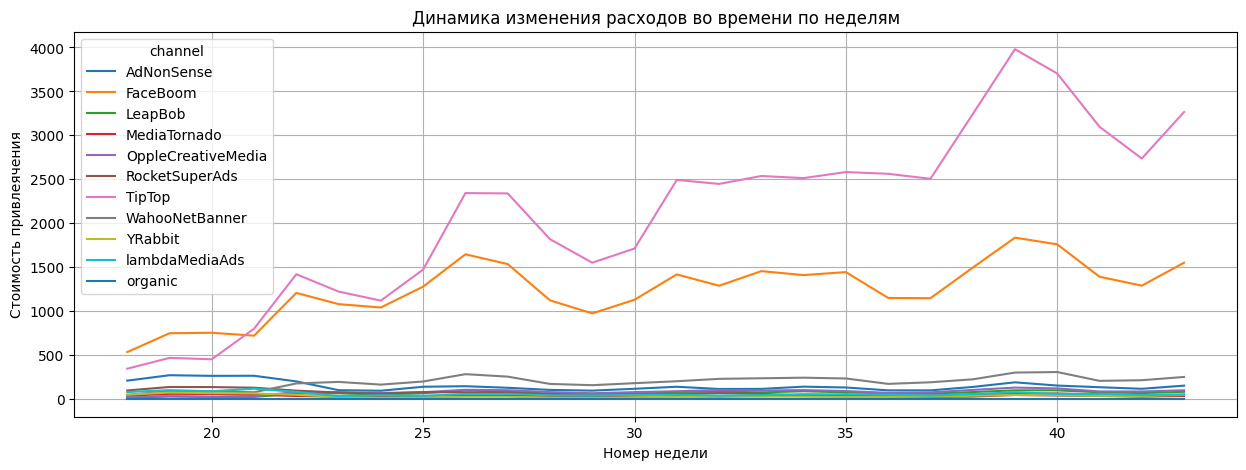

In [45]:
profiles.pivot_table(
    index='week',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)

plt.title('Динамика изменения расходов во времени по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Стоимость привлеячения')
plt.show()

Построим график динамики изменения расходов во времени по месяцам:

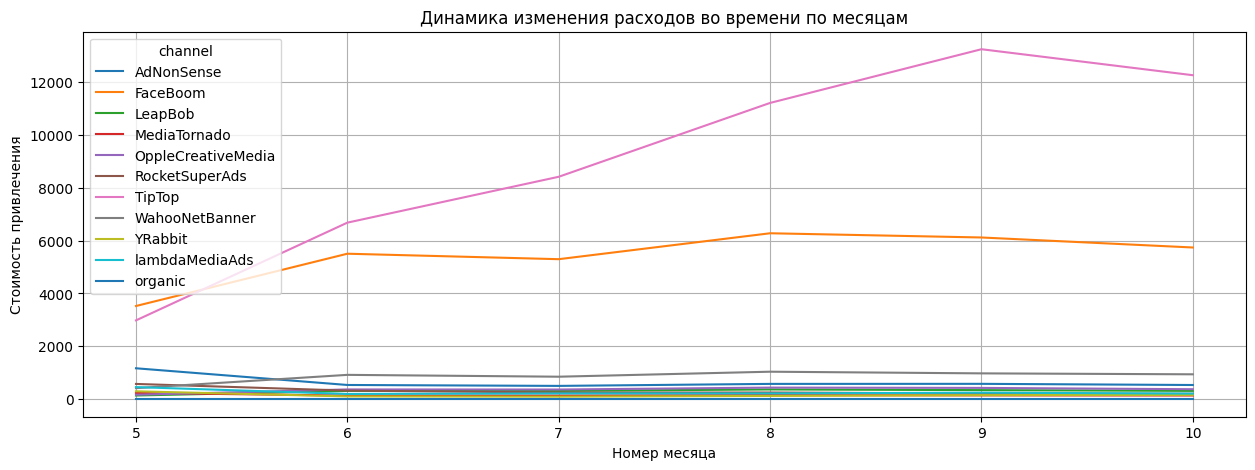

In [46]:
profiles.pivot_table(
    index='month',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)

plt.title('Динамика изменения расходов во времени по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Стоимость привлечения')
plt.show()

**Вывод:** по недельному и месячному графикам четко прослеживается, что затраты на рекламу  в FaceBoom и TipTop постоянно росли. Пик расходов наблюдается на 9 месяце, а если быть точнее где-то на 38-39 неделе с начала рекламной компании. В остальные источники стабильно практически не вкладывали деньги.

#### Стоимость привлечения одного пользователя (CAC) из каждого источника

Построим таблицу, отражающую затраты на привлечение одного пользователя для каждого рекламного источника:

In [47]:
print(
    profiles.groupby('channel')
    .agg({
        'acquisition_cost': 'mean'
        }
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .round(2)
)

                    acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00


**Вывод:** интересно, что стоимость привлечения одного пользователя в FaceBoom не намного отличается от других рекламных источников. Например, затраты практически соотвествуют как и у источника AdNonSense, а относительно других источников затраты на привлечение одного пользователя в FaceBoom превышают в 1.5 - 5 раз. Тогда как в TipTop стоимость превышает в 4 - 13 раз. Получается, что, несмотря на большое количество привлеченных пользователей, реклама в TipTop не очень эффективна по стоимости. В FaceBoom можно добиться тех же результатов при меньших затратах.

### Окупаемость рекламы

Органических пользователей нет смысла анализировать, так как на них не было затрат на рекламу:

In [48]:
profiles = profiles.query('channel != "organic"')

Необходимо проанализировать данные по состоянию на 1 ноября 2019 года, примем эту дату за момент анализа.

Горизонт анализа примем 2 недели, как это заложено в бизнес-плане.

Зададим момент и горизонт анализа:

In [49]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Построим графики:

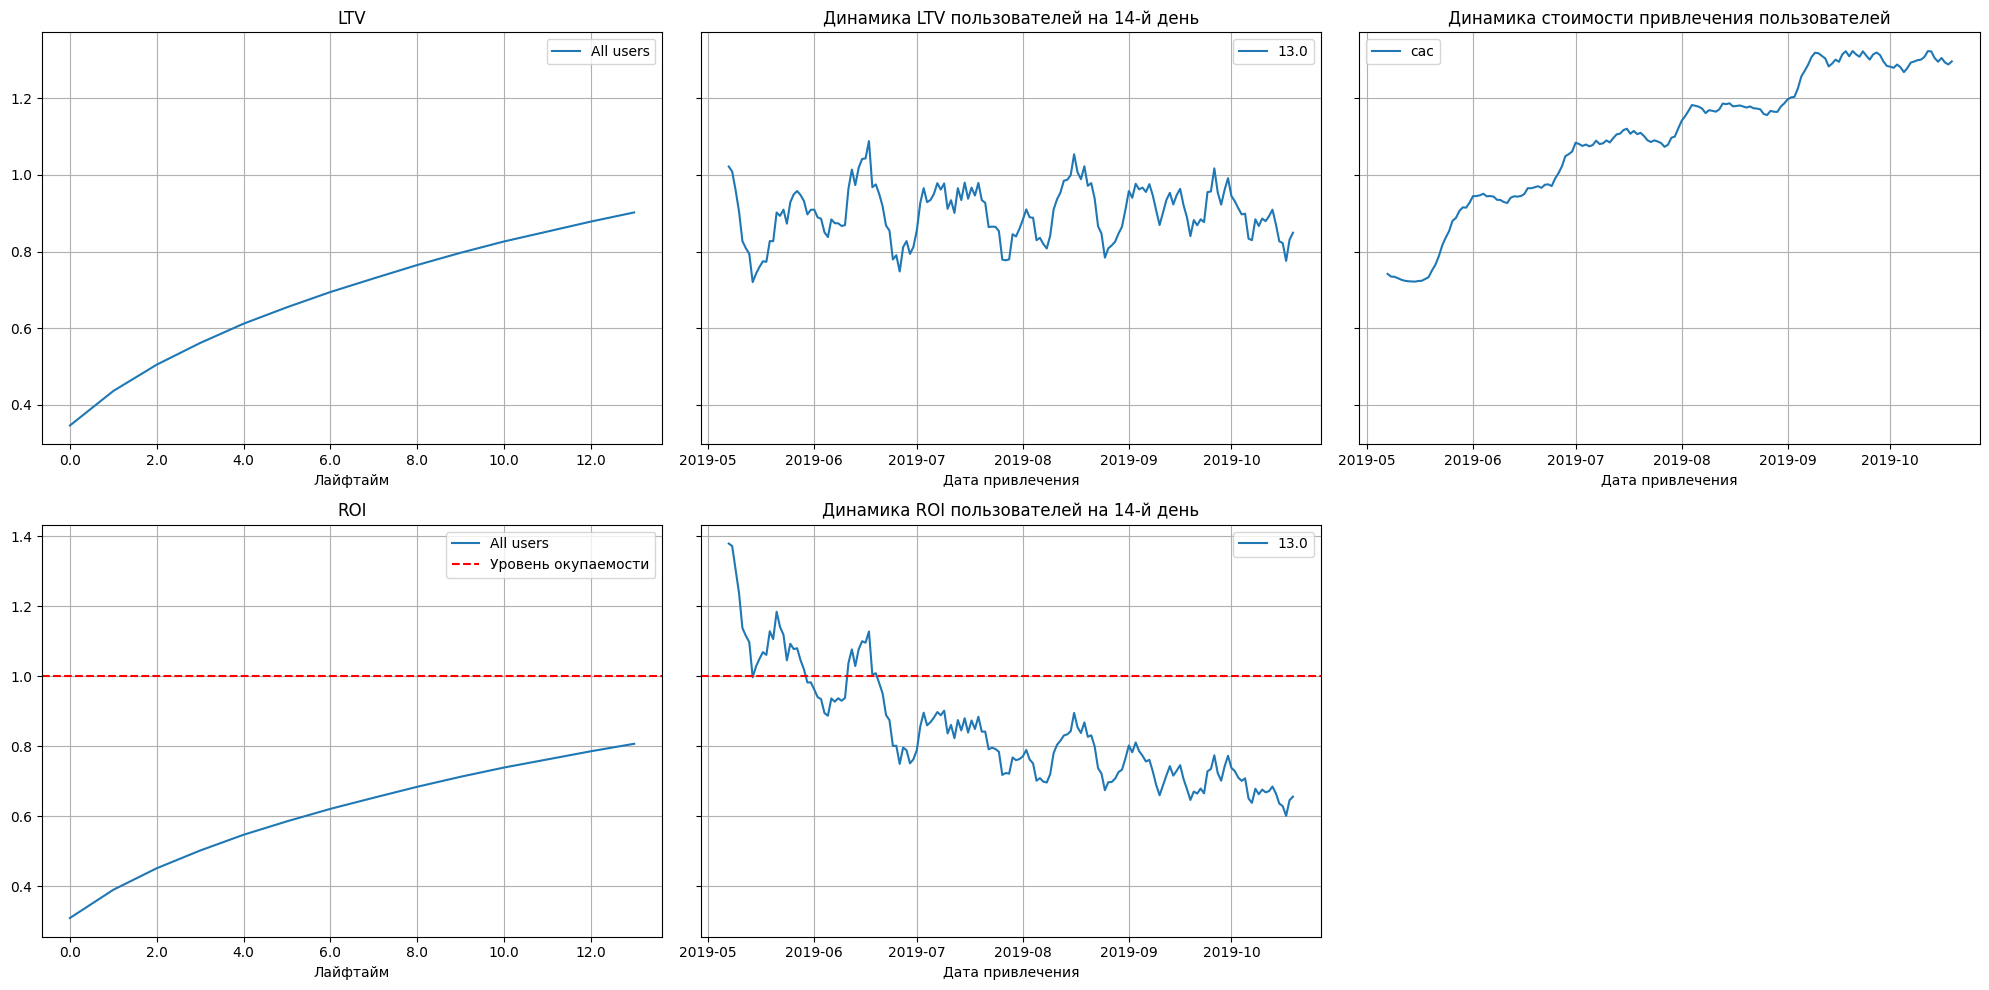

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** из вышеприведенных графиков видно, что количество привлеченных пользователей стабильно. Стоимость привлечения пользователей растет, из этого следует, что на рекламу расходуется все больше денег из рекламного бюджета. Также видно, что с середины июня реклама перестала окупаться.

#### Анализ конверсии и удержания пользователей, динамики изменения

Проанализируем конверсию и динамику ее изменения:


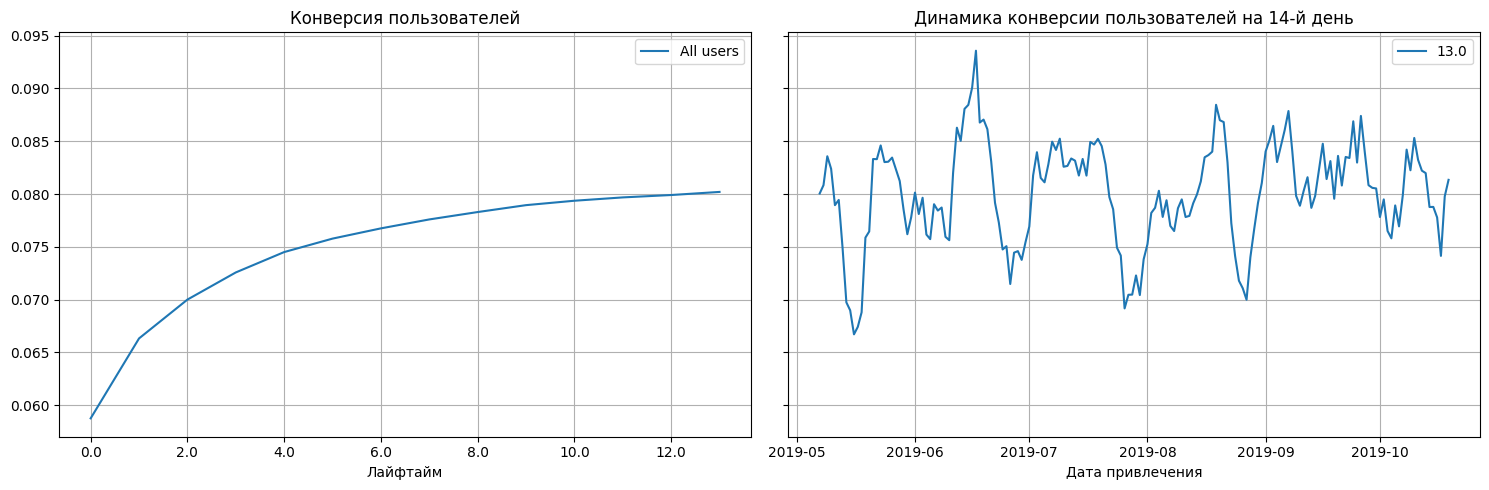

In [51]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** судя по построенным графикам, проблем с конверсией и ее динамикой нет.

Проанализируем удержание и динамику изменения:

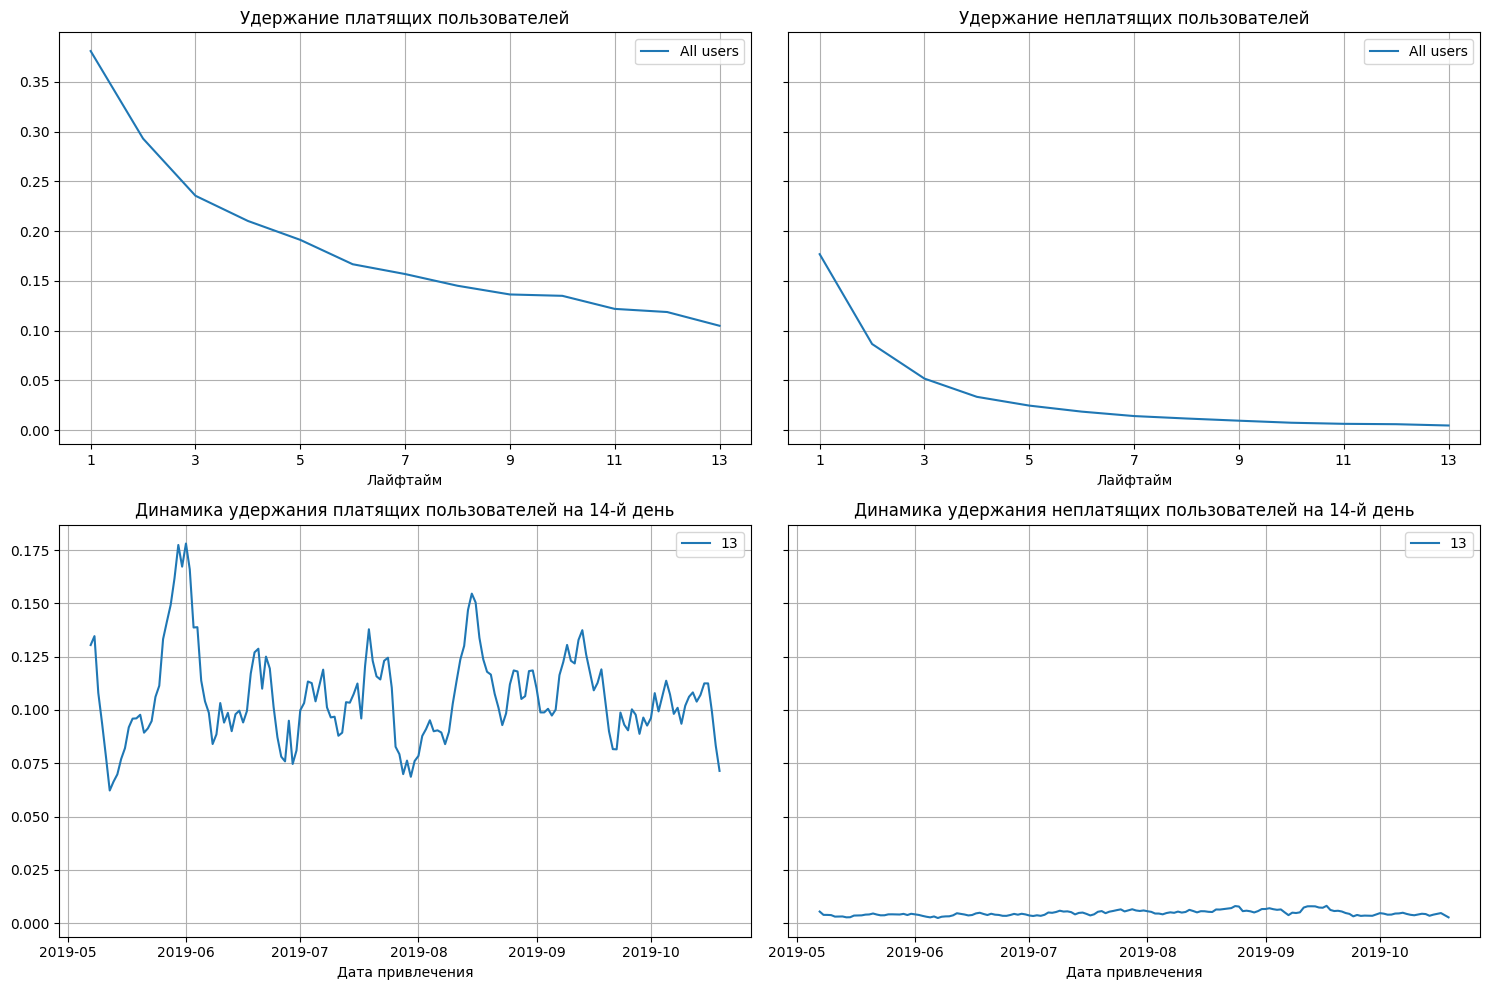

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** графики показывают, что удержание пользователей падает. Необходимо проанализировать окупаемость с разбивкой.

#### Анализ окупаемости рекламы с разбивкой по устройствам

Посмотрим окупаемость с разбивкой по устройствам:

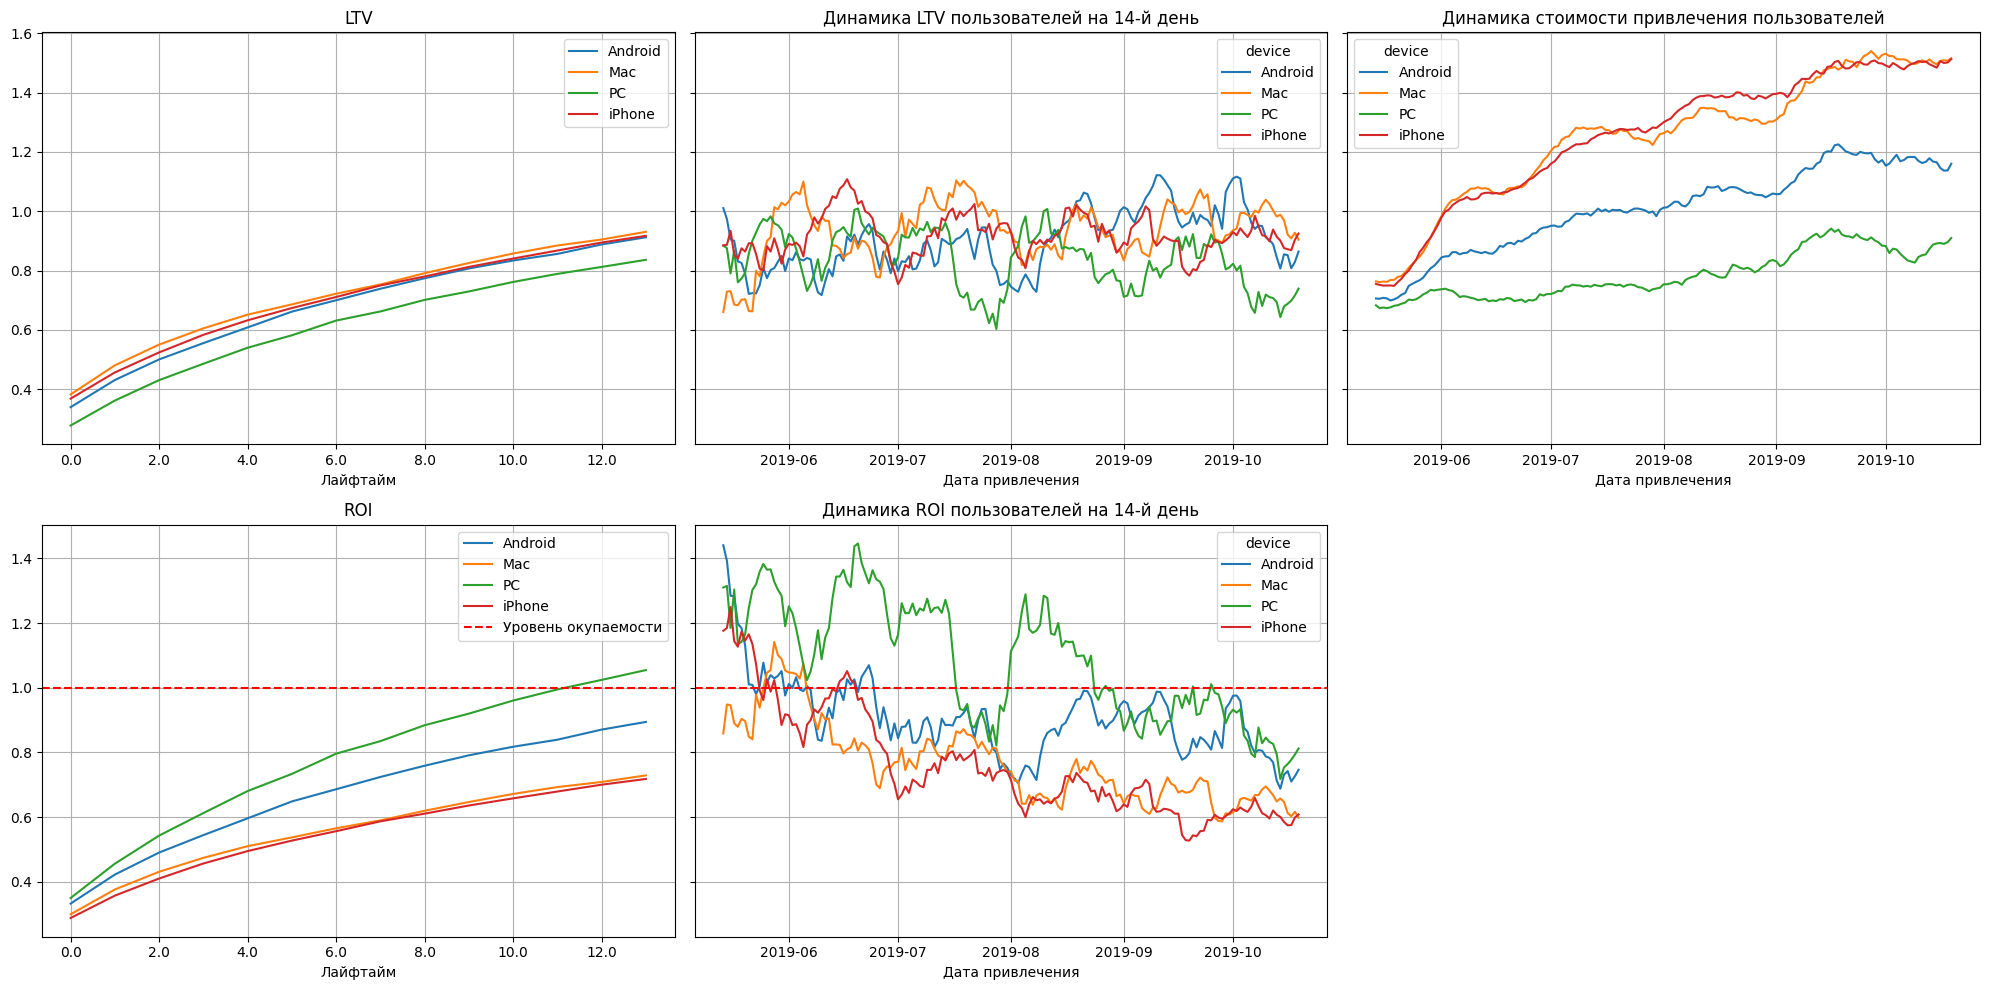

In [53]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:** LTV пользователей всех устройств стабильно растет, выделяется LTV пользователей PC - ниже всех. Динамика LTV показывает, что ближе к концу августа, в сентябре и в середине ноября резкое снижение у пользователей PC, чего нельзя сказать о других устройствах.
Пользователи всех устройств на протяжении двухнедельного лайфтайма не окупались, только пользователи PC смогли выйти на небольшой уровень окупаемости после 11 лайфтайма. Также обратим внимание, что по пользователи PC самые дешевые по стоимости привлечения, а пользователи Mac и iPhone самые дорогие.

#### Анализ окупаемости рекламы с разбивкой по странам

Посмотрим окупаемость с разбивкой по странам:


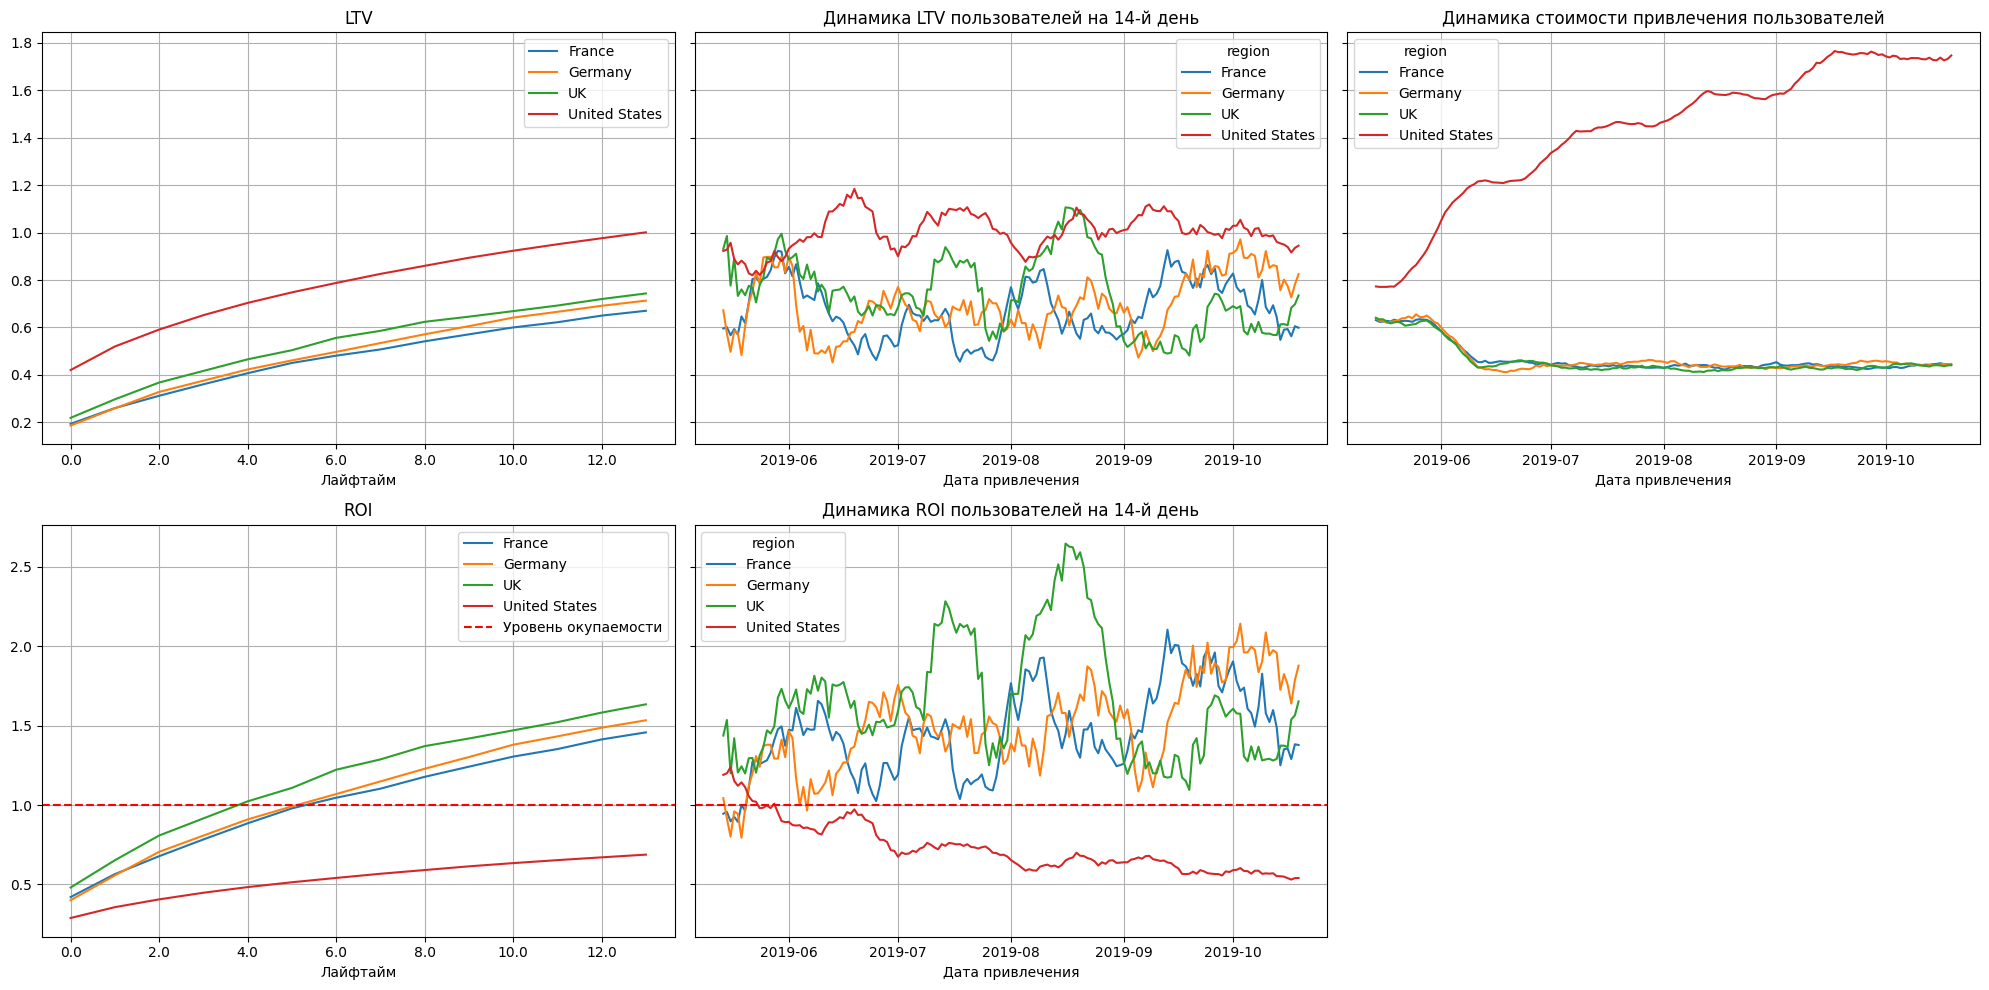

In [54]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:** LTV пользователей из США намного выше, чем у пользователей других стран. Также динамика LTV у американцев наиболее стабильная. На графике динамики стоимости привлечения пользователей по странам выделяется аномалия - стомость привлечения пользователй в США в разы выше, чем в других странах. Из-за этого только пользователи в США не смогли превысить уровень окупаемости. На графике динамики ROI у пользователей Великобритании в июле и в августе наблюдаются два сильных всплеска.

#### Анализ окупаемости рекламы с разбивкой по источникам привлечения

Посмотрим окупаемость с разбивкой по источникам привлечения:

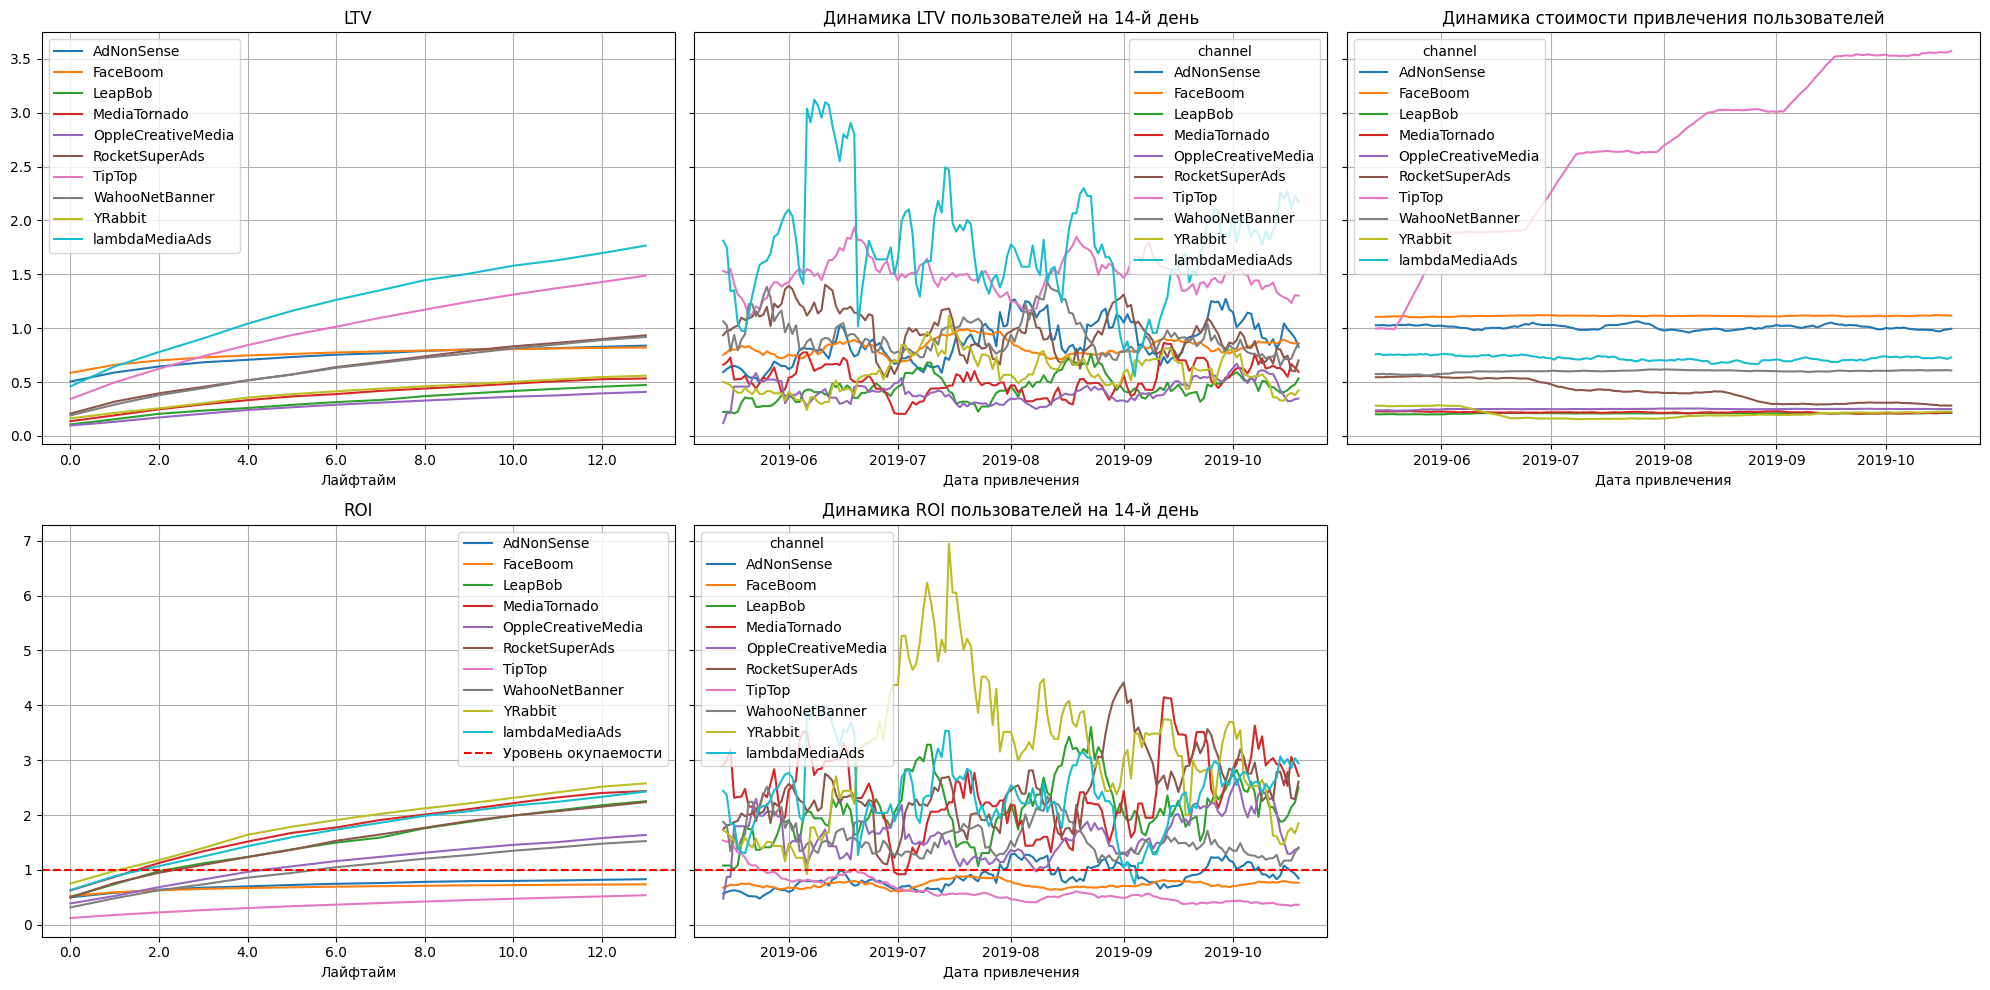

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:** На графике LTV видно, что лучше всего показывает себя рекламный сервис lambdaMediaAds и TipTop. Также у них самая высокая динамика LTV, при этом у lambdaMediaAds есть просадка, а TipTop более стабильный. Затраты на рекламу в TipTop растут каждый месяц, тогда как затраты на остальные источники стабильны. При этом не окупаются только три источника - TipTop, FaceBoom и AdNonSense. Сильный всплеск в июле у YRabbit на графике динамики ROI.

#### Анализ конверсии с разбивкой

Проанализируем конверсию и динамику ее изменения c разбивкой по странам:

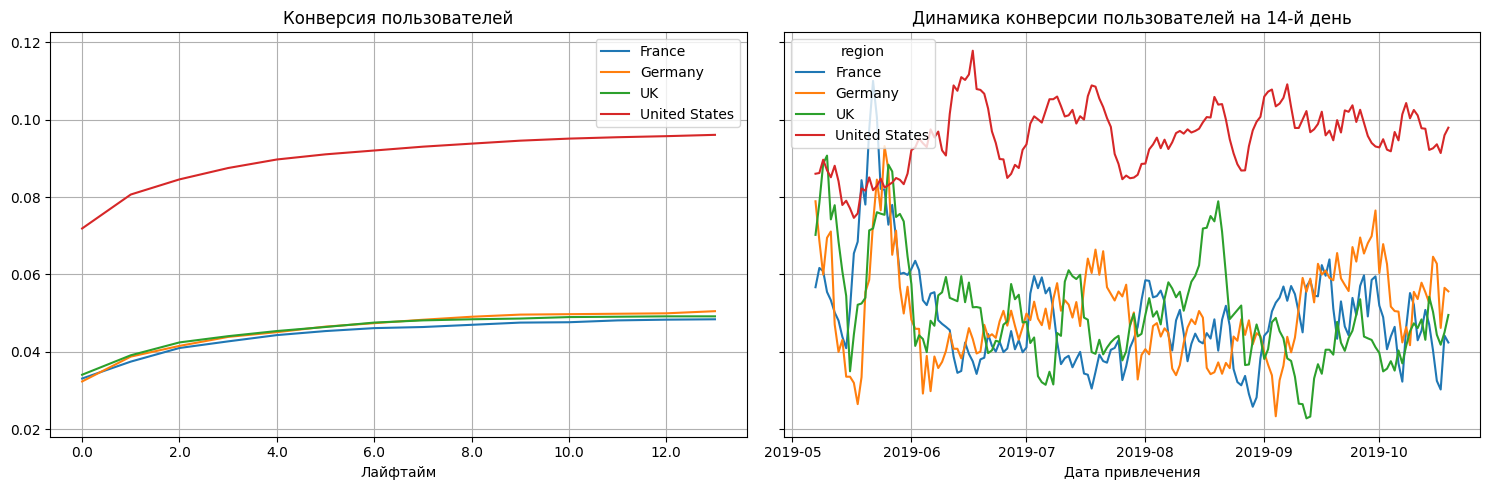

In [56]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Проанализируем удержание и динамику изменения с разбивкой по странам:

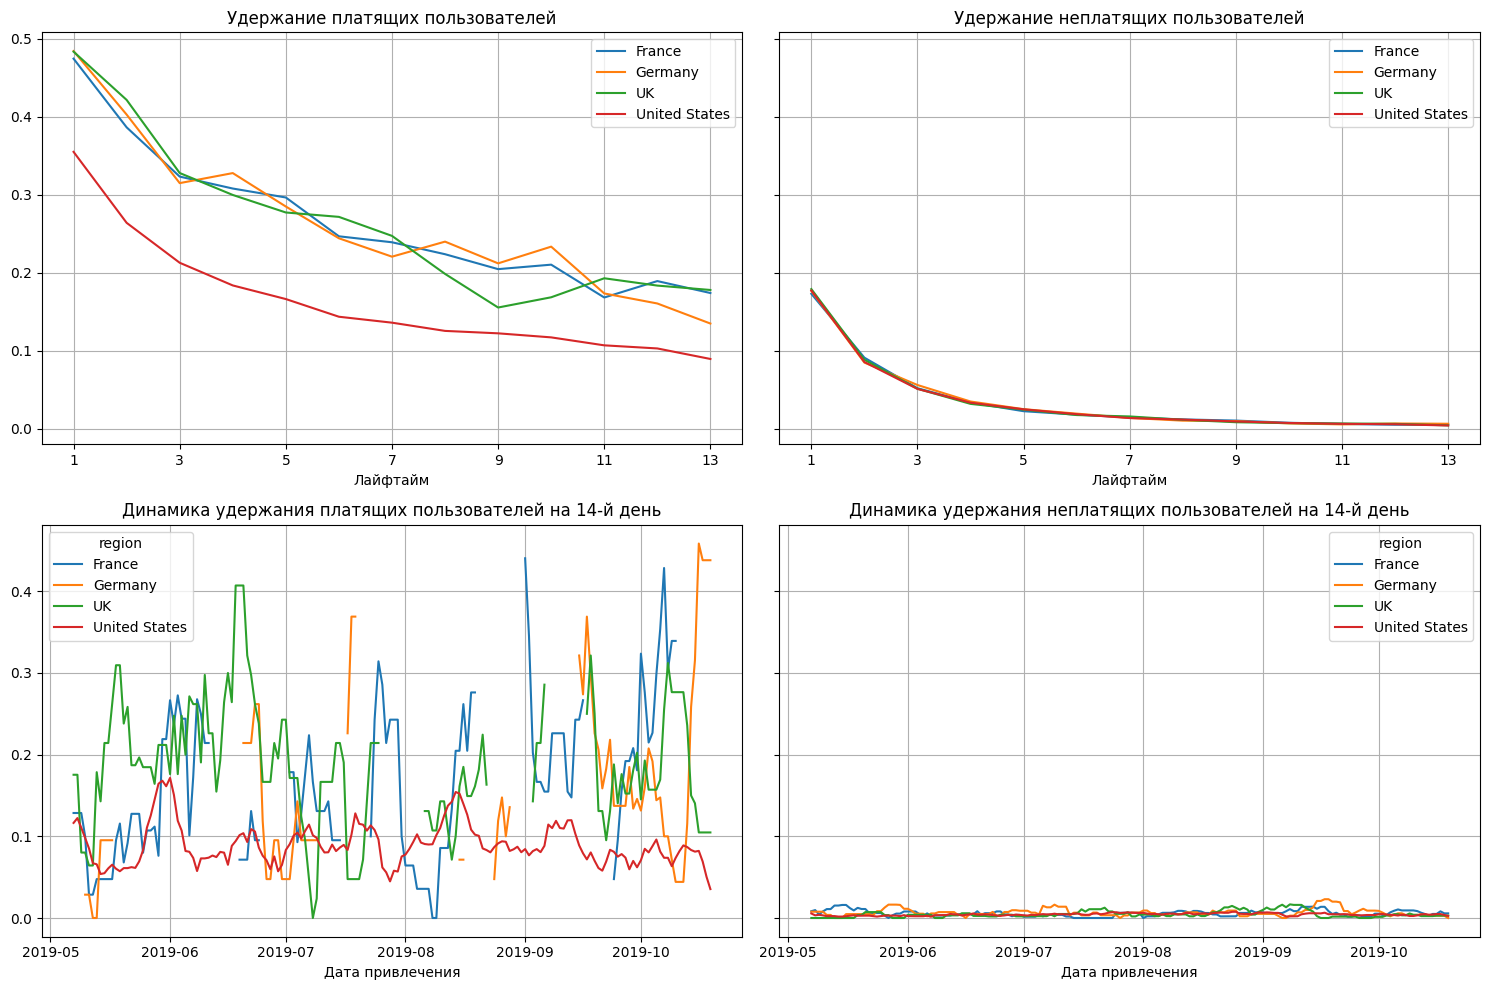

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** несмотря на то, что пользователи в США лучше других стран конверсируются, у них наихудшее удержание платящих пользователей. На графике удержания видны низкие показатели пользователей США.

Вероятно, приложение очень востребовано у американцев, однако, тот функционал, что оно предлагает, их не устраивает. Возможно, следует взять обратную связь и выяснить причины низкого удержания.

Проанализируем конверсию и динамику ее изменения c разбивкой по устройствам:

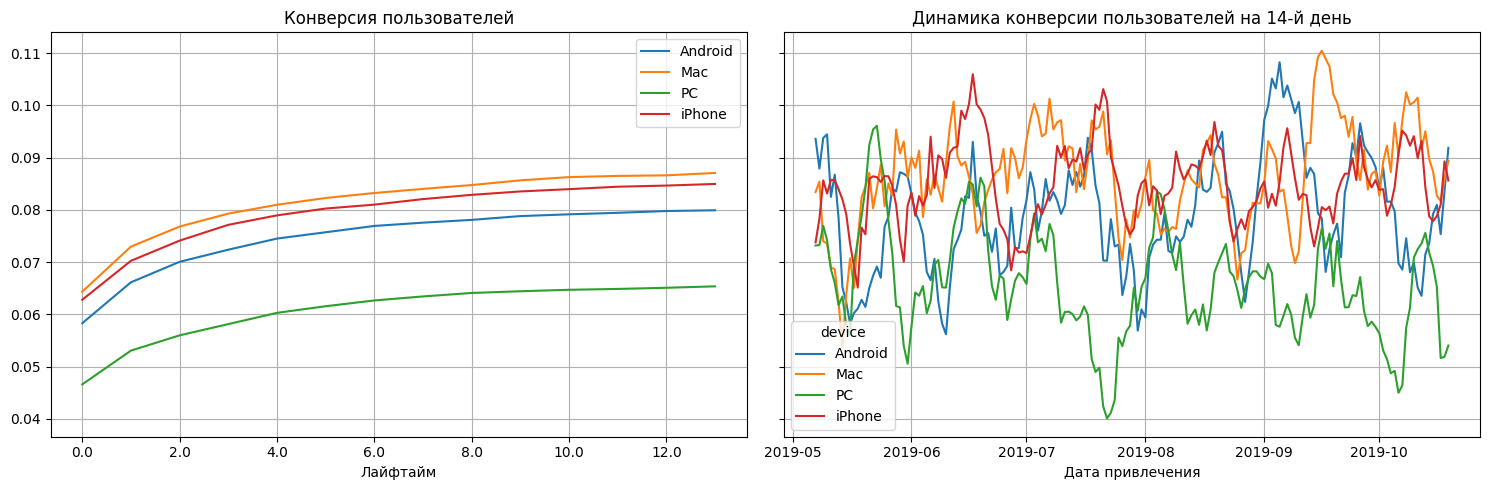

In [58]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Проанализируем удержание и динамику изменения с разбивкой по устройствам:

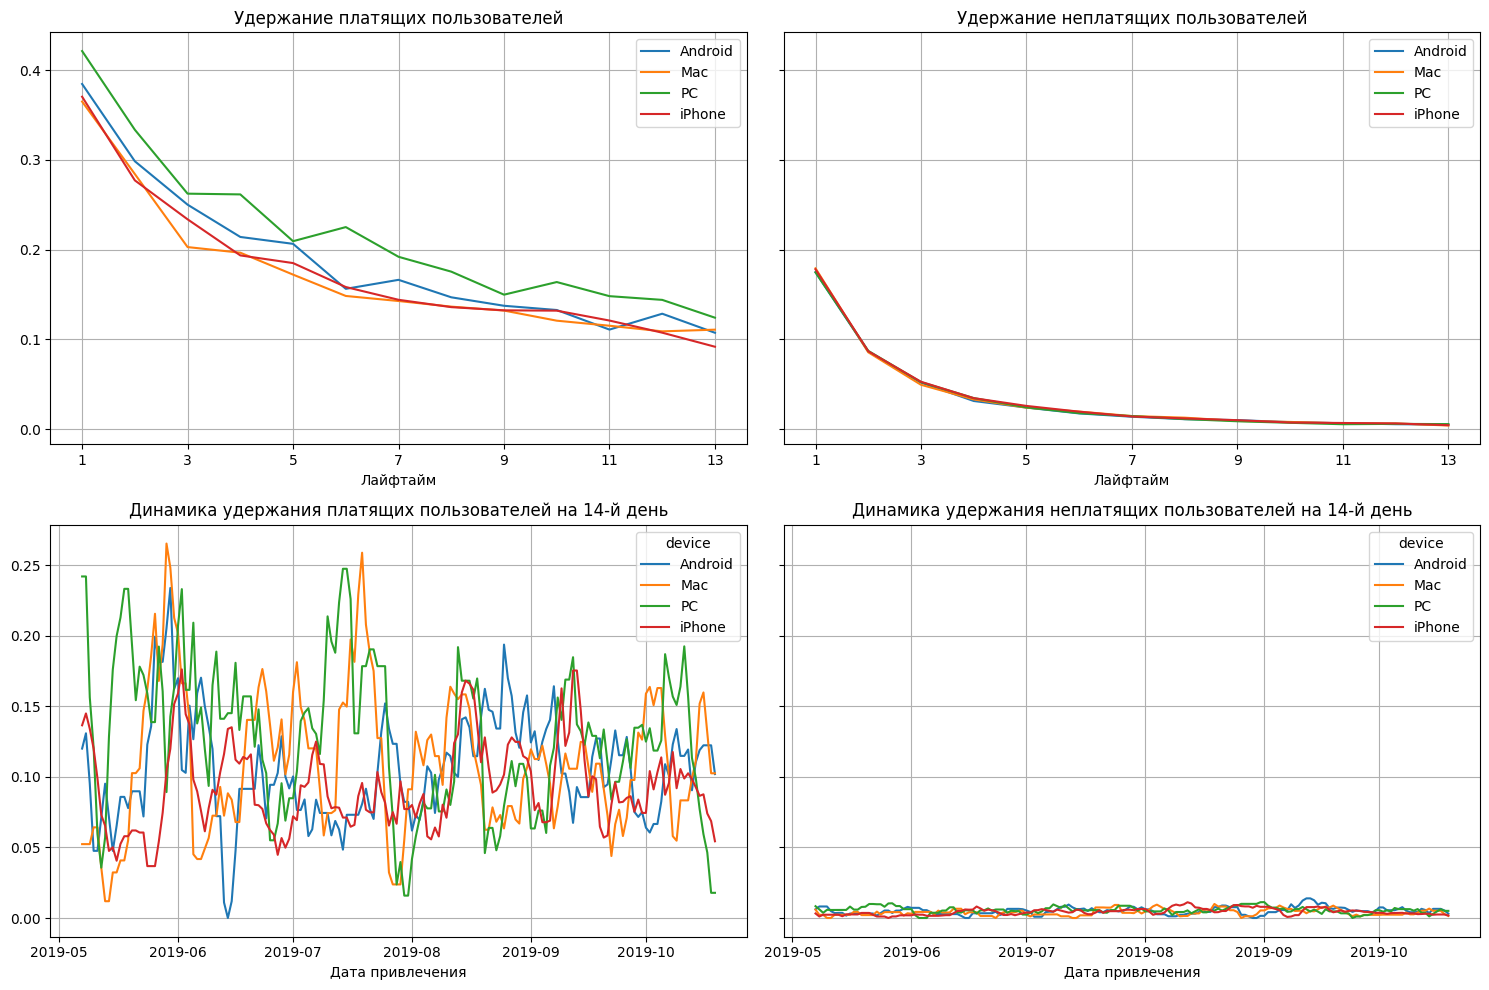

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** проблем с конверсией на устройствах нет, разве что низкие показатели пользователей PC. Удержание пользователей низкое и падает на всех устройствах.

Особых аномалий нет, значит, тип устройства практически не влияет на удержание пользователей.

Проанализируем конверсию и динамику ее изменения c разбивкой по каналам:

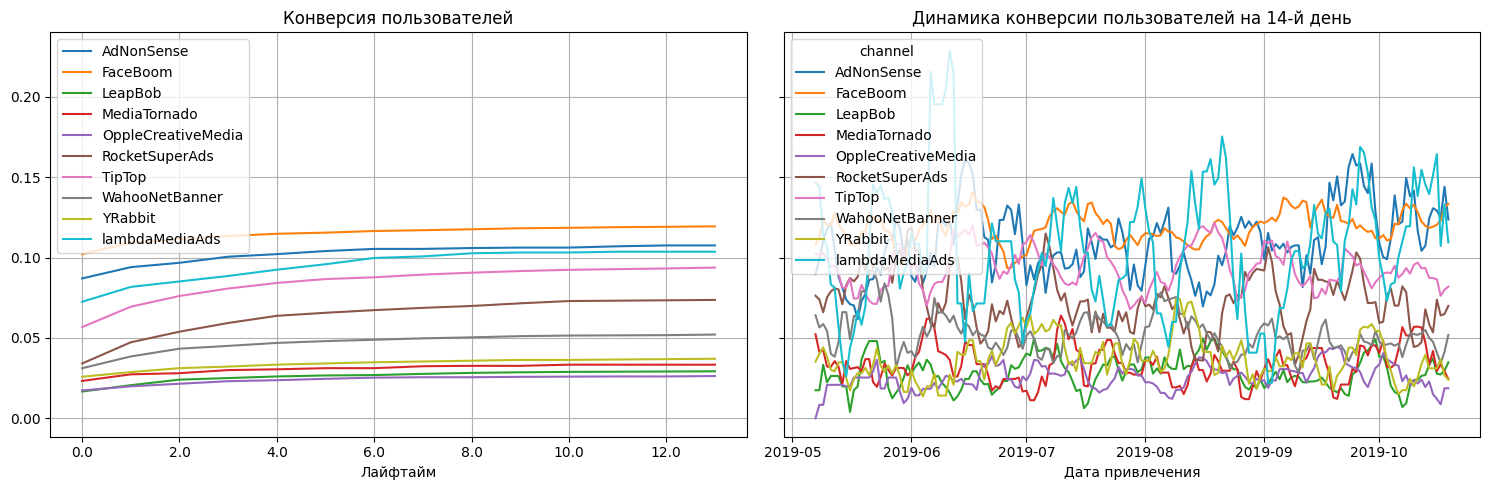

In [60]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Проанализируем удержание и динамику изменения с разбивкой по каналам:

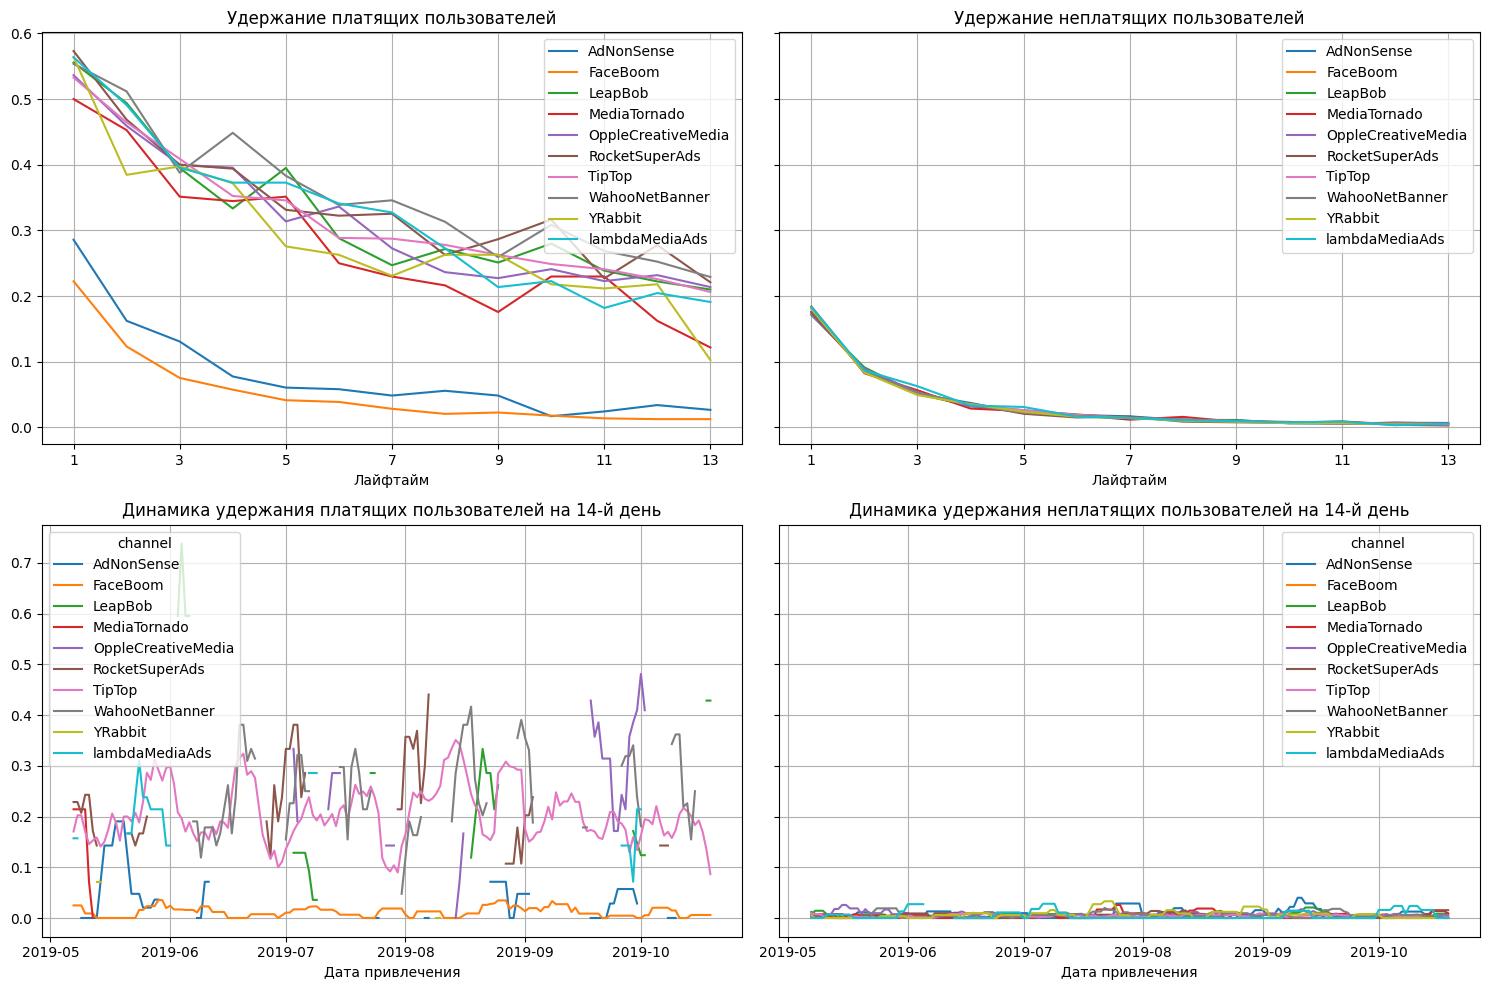

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** сильно бросается в глаза низкое удержание в сервисах AdNonSense и FaceBoom. Отличная конверсия у lambdaMediaAds.

Необходимо изменить рекламную компанию на площадках AdNonSense и FaceBoom, возможно, нужно сделать акцент на долгосрочной перспективе использования приложения, чтобы пользователи продолжали им пользоваться.

## Общий вывод

На стадии предобработки данных были устранены следующие проблемы в датасетах:
* изменены названия столбцов;
* данные приведены к корректным типам данных.

Пропусков и дубликатов не обнаружено, значит на дальнейший анализ бизнес-показателей ничто негативно не повлияло.

В результате исследования были проанализированы данные с 1 мая по 27 октября 2019 года.

Были выявлены основные проблемы:

* из-за огромных расходов на рекламу, пользователи TipTop не окупаются, несмотря на хорошее удержание пользователей;
* хуже всего удержание у источников FaceBoom и AdNonSense;
* перспективно выглядит канал lambdaMediaAds - у него хорошие показатели окупаемости и удержания;
* вызывет озабоченность пользователи в США - там не окупаются расходы на рекламу.

На основании выявленных проблем можно дать следующие рекомендации:

* необходимо изменить подход к пользователям в США, так как в настоящий момент пользователи заинтересованы в приложении, но очень быстро прекращают им пользоваться. На американском рынке перспективным каналом выглядит RocketSuperAds, так как у него хорошие показатели окупаемости и конверсии. Возможно, на этом рынке стоит больше вложить именно в эту площадку;
* снизить расходы на рекламу в TipTop, ибо огромные затраты не оправдывают средств, а затем повторно проаназилировать окупаемость, возможно, имеет смысл отказаться от сотрудничества с этой платформой;
* дополнительно инвестировать в сервис lambdaMediaAds.